In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data_df=pd.read_csv(r'C:\Users\PC\Documents\카카오톡 받은 파일\train_mdf.csv')

**ID열은 단순 식별자 이므로 제거**

In [4]:
data_df.drop('Id',axis=1,inplace=True)

**object data중 점수로 표현 할 수 있는 칼럼들 점수로 변환**

In [5]:
def get_value(a):
    cat=''
    if a=='Ex':cat=9
    elif a=='Gd':cat=7
    elif a=='TA':cat=5
    elif a=='Fa':cat=3
    elif a=='Po':cat=1
    else:cat=0
    return cat

In [6]:
data_df['ExterQual']=data_df['ExterQual'].apply(lambda x : get_value(x))
data_df['ExterCond']=data_df['ExterCond'].apply(lambda x : get_value(x))
data_df['BsmtQual']=data_df['BsmtQual'].apply(lambda x : get_value(x))
data_df['BsmtCond']=data_df['BsmtCond'].apply(lambda x : get_value(x))
data_df['HeatingQC']=data_df['HeatingQC'].apply(lambda x : get_value(x))
data_df['KitchenQual']=data_df['KitchenQual'].apply(lambda x : get_value(x))
data_df['FireplaceQu']=data_df['FireplaceQu'].apply(lambda x : get_value(x))
data_df['GarageQual']=data_df['GarageQual'].apply(lambda x : get_value(x))
data_df['GarageCond']=data_df['GarageCond'].apply(lambda x : get_value(x))

In [7]:
data_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,5.791781,5.167123,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,1.148561,0.702108,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,5.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,5.000000,5.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,7.000000,5.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,9.000000,9.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**object data 와 num data로 나누기**

In [8]:
obj_data=data_df.select_dtypes(include=object)
num_data=data_df.select_dtypes(exclude=object)

**obj_data의 결측치 확인**

In [9]:
obj_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  Foundation     1460 non-null

**Alley**-> na 값을 None으로 채우기 (포장이 아무것도 안되어 있는 의미)<br/>

**MasVnrType** -> None값으로 채우기(MasVnrType이 없으므로 0)<br/>

**BsmtExposure** -> None으로 채우기 (지하실이 없는 것이므로)<br/>

**BsmtFinType1** -> None으로 채우기 (지하실이 없는 것이므로)<br/>

**BsmtFinType2** -> None으로 채우기 (지하실이 없는 것이므로)<br/>

**Electrical**->최빈값으로 채우기<br/>

**GarageType**-> None으로 채우기 (차고가 없는 것이므로)<br/>

**GargeFinish**-> None으로 채우기 (차고가 없는 것이므로)<br/>

**PoolQC**->수영장이 있는 집이 거의 존재 하지 않으므로 있고 없음만 나타내기 위해 이 변수는 삭제<br/>

**Fence->** None으로 채우기 (울타리가 없는 것이므로)<br/>

**MiscFeature**-> None으로 채우기(다른 특별한 특징이 없는 것이므로)<br/>

In [10]:
columns=['Alley','MasVnrType','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType',
         'GarageFinish','Fence','MiscFeature']
for col in columns:
    obj_data[col].fillna('None',inplace=True)

C:\Users\PC\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [11]:
obj_data.drop('PoolQC',axis=1,inplace=True)

C:\Users\PC\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [12]:
print("pandas version: ", pd.__version__)
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

pandas version:  1.0.5


In [171]:
obj_data.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,CentralAir,Electrical,Functional,GarageType,GarageFinish,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1459,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,3,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,6,5,7,7,6,2,5,7,7,4,3,5,5,9,6
top,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,No,Unf,Unf,GasA,Y,SBrkr,Typ,Attchd,Unf,Y,None,None,WD,Normal
freq,1151,1454,1369,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,872,647,953,430,1256,1428,1365,1334,1360,870,605,1340,1179,1406,1267,1198


## num_data결측치 확인

In [13]:
num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   ExterQual      1460 non-null   int64  
 9   ExterCond      1460 non-null   int64  
 10  BsmtQual       1460 non-null   int64  
 11  BsmtCond       1460 non-null   int64  
 12  BsmtFinSF1     1460 non-null   int64  
 13  BsmtFinSF2     1460 non-null   int64  
 14  BsmtUnfSF      1460 non-null   int64  
 15  TotalBsmtSF    1460 non-null   int64  
 16  HeatingQC      1460 non-null   int64  
 17  1stFlrSF       1460 non-null   int64  
 18  2ndFlrSF

## 데이터 분포 파악

In [172]:
num_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,5.791781,5.167123,6.003425,4.895205,443.639726,46.549315,567.240411,1057.429452,7.290411,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.023288,6.517808,0.613014,3.123288,1978.506164,1.767123,472.980137,4.676027,4.673288,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,1.148561,0.702108,1.656396,0.972890,456.098091,161.319273,441.866955,438.705324,1.919002,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.327520,1.625393,0.644666,3.148572,24.689725,0.747315,213.804841,1.232349,1.224929,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,5.000000,5.000000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,5.000000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,5.000000,0.000000,0.000000,1961.000000,1.000000,334.500000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,5.000000,5.000000,7.000000,5.000000,383.500000,0.000000,477.500000,991.500000,9.000000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,5.000000,6.000000,1.000000,3.000000,1980.000000,2.000000,480.000000,5.000000,5.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,7.000000,5.000000,7.000000,5.000000,712.250000,0.000000,808.000000,1298.250000,9.000000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,7.000000,1.000000,7.000000,2002.000000,2.000000,576.000000,5.000000,5.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,9.000000,9.000000,9.000000,7.000000,5644.000000,1474.000000,2336.000000,6110.000000,9.000000,4692.000000,2065.000

**LotFrontage**-> 집과의 거리이므로 비어있는 값은 평균값으로 대체

**MasVnrArea**-> None값이 아닌 데이터 중 절반 이상이 0 값이므로 0값으로 입력

**GarageYrBlt**-> 평균값으로 대체

In [14]:
num_data['LotFrontage'].fillna(num_data['LotFrontage'].mean(),inplace=True)
num_data['GarageYrBlt'].fillna(num_data['GarageYrBlt'].mean(),inplace=True)
num_data['MasVnrArea'].fillna(0,inplace=True)

**종속변수 분포 살펴보기**

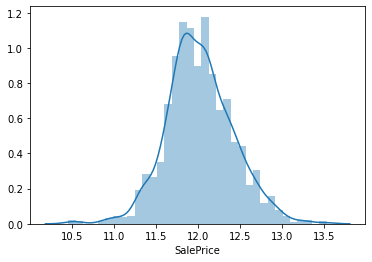

In [23]:
sns.distplot(data_df['SalePrice']) #왜곡

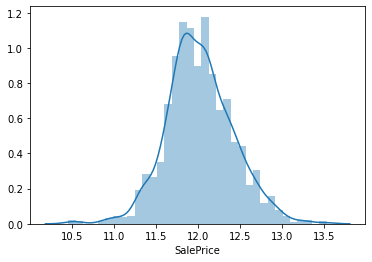

In [15]:
data_df['SalePrice']=np.log1p(data_df['SalePrice'])
sns.distplot(data_df['SalePrice']) #로그 변환으로 정규분포 형태 맞춰주기

In [54]:
features=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold','SalePrice']
a=pd.DataFrame()
for i in features:
    
    data_scaled=pd.Series(np.log1p(num_data[i]))
    a[i]=data_scaled
a


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,4.110874,4.189655,9.042040,2.079442,1.791759,7.602900,7.602900,5.283204,2.079442,1.791759,2.079442,1.791759,6.561031,0.000000,5.017280,6.753438,2.302585,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,2.079442,2.197225,0.000000,0.000000,7.602900,1.098612,6.308098,1.791759,1.791759,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.000000,1.098612,7.605392
1,3.044522,4.394449,9.169623,1.945910,2.197225,7.589336,7.589336,0.000000,1.791759,1.791759,2.079442,1.791759,6.886532,0.000000,5.652489,7.141245,2.302585,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,1.098612,0.000000,1.386294,0.693147,1.791759,1.945910,0.693147,1.791759,7.589336,1.098612,6.133398,1.791759,1.791759,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.791759,7.604894
2,4.110874,4.234107,9.328212,2.079442,1.791759,7.601902,7.602401,5.093750,2.079442,1.791759,2.079442,1.791759,6.188264,0.000000,6.075346,6.825460,2.302585,6.825460,6.765039,0.0,7.488294,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,2.079442,1.945910,0.693147,1.791759,7.601902,1.098612,6.411818,1.791759,1.791759,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.000000,2.302585,7.605392
3,4.262680,4.110874,9.164401,2.079442,1.791759,7.557995,7.586296,0.000000,1.791759,1.791759,1.791759,2.079442,5.379897,0.000000,6.293419,6.629363,2.079442,6.869014,6.629363,0.0,7.448916,0.693147,0.000000,0.693147,0.000000,1.386294,0.693147,2.079442,2.079442,0.693147,2.079442,7.600402,1.386294,6.466145,1.791759,1.791759,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.000000,1.098612,7.604396
4,4.110874,4.442651,9.565284,2.197225,1.791759,7.601402,7.601402,5.860786,2.079442,1.791759,2.079442,1.791759,6.486161,0.000000,6.196444,7.044033,2.302585,7.044033,6.960348,0.0,7.695758,0.693147,0.000000,1.098612,0.693147,1.609438,0.693147,2.079442,2.302585,0.693147,1.791759,7.601402,1.386294,6.729824,1.791759,1.791759,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.000000,2.564949,7.605392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.110874,4.143135,8.976894,1.945910,1.791759,7.600902,7.601402,0.000000,1.791759,1.791759,2.079442,1.791759,0.000000,0.000000,6.860664,6.860664,2.302585,6.860664,6.543912,0.0,7.407318,0.000000,0.000000,1.098612,0.693147,1.386294,0.693147,1.791759,2.079442,0.693147,1.791759,7.600902,1.098612,6.133398,1.791759,1.791759,0.000000,3.713572,0.000000,0.0,0.0,0.0,0.000000,2.197225,7.604894
1456,3.044522,4.454347,9.486152,1.945910,1.945910,7.590347,7.595387,4.787492,1.791759,1.791759,2.079442,1.791759,6.673298,5.099866,6.380123,7.341484,1.791759,7.637234,0.000000,0.0,7.637234,0.693147,0.000000,1.098612,0.000000,1.386294,0.693147,1.791759,2.079442,1.098612,1.791759,7.590347,1.098612,6.216606,1.791759,1.791759,5.857933,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.098612,7.606387
1457,4.262680,4.204693,9.109746,2.079442,2.302585,7.571474,7.604396,0.000000,2.302585,2.079442,1.791759,2.079442,5.620401,0.000000,6.777647,7.050123,2.302585,7.080868,7.050123,0.0,7.758333,0.000000,0.000000,1.098612,0.000000,1.609438,0.693147,2.079442,2.302585,1.098612,2.079442,7.571474,0.693147,5.533389,1.791759,1.791759,0.000000,4.110874,0.000000,0.0,0.0,0.0,7.824446,1.791759,7.606387
1458,3.044522,4.234107,9.181735,1.791759,1.945910,7.576097,7.599401,0.000000,1.791759,1.791759,1.791759,1.791759,3.912023,6.937314,0.000000,6.983790,2.079442,6.983790,0.000000,0.0,6.983790,0.693147,0.000000,0.693147,0.000000

In [59]:
from scipy.stats import skew
skew_features=a[a.columns].apply(lambda x : skew(x))
skew_features[skew_features>1].sort_values(ascending=False)

PoolArea         14.348342
3SsnPorch         7.727026
LowQualFinSF      7.452650
MiscVal           5.165390
BsmtHalfBath      3.929022
KitchenAbvGr      3.865437
ScreenPorch       3.147171
BsmtFinSF2        2.521100
EnclosedPorch     2.110104
dtype: float64

In [44]:
obj_data_dum

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,...,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1456,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1457,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1458,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


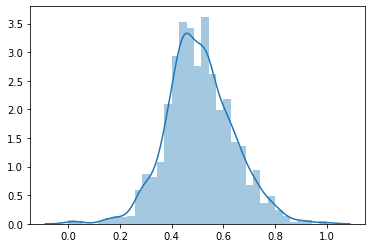

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
y=scaler.fit_transform(np.array(data_df['SalePrice']).reshape(-1,1))
sns.distplot(y)

**범주형 데이터에서 종속변수(SalePrice)와 높은상관관계 가진 변수 확인**<br/>
- 범주형데이터 pd.get_dummies를 이용해 숫자형으로 변환<br/>
- 피어슨 상관관계 0.3이상인 변수만 추출<br/>


In [16]:
obj_data_dum=pd.get_dummies(obj_data)

In [17]:
a=pd.concat([obj_data_dum,data_df['SalePrice']],axis=1)
a

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,...,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,12.247699
1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,12.109016
2,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,12.317171
3,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,11.849405
4,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,12.072547
1456,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,12.254868
1457,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,12.493133
1458,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,11.864469


In [22]:
corr_obj

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,...,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
MSZoning_C (all),1.000000,-0.017926,-0.008742,-0.160278,-0.034792,0.254287,-0.254287,-0.015638,-0.047292,0.086418,-0.040840,-0.014116,-6.896552e-03,0.045922,0.023234,0.030026,0.093897,-0.081736,0.002174,-0.002174,0.004292,-0.021785,-0.015146,-0.004353,0.014704,-0.091058,0.102868,-0.007871,-0.009014,-0.003076,-0.008742,-0.016891,-0.011612,-0.028101,-0.015800,-0.022519,-0.019862,0.462172,-0.009014,-0.015476,-0.035447,-0.006540,-0.019052,-0.014116,-0.019595,0.007024,-0.010961,-0.019189,-0.017042,-0.020776,...,-0.003768,-0.002174,-0.092772,-0.008171,-0.004868,-0.012232,-0.012823,-0.008461,-0.002174,0.022519,-0.005335,-0.100844,0.063740,-0.021032,0.099559,0.063019,0.052429,-0.046808,0.052429,0.002008,0.014433,0.151361,-0.012028,-0.126329,-0.017042,0.027728,0.024787,-0.007236,-0.022652,-0.003076,-0.071730,-0.003076,0.076747,-0.002174,0.083771,-0.004353,-0.003076,0.205659,-0.004868,-0.004868,-0.025077,-0.003768,-0.065664,0.140993,-0.004353,0.084420,-0.009787,-0.091013,-0.025412,-0.188377
MSZoning_FV,-0.017926,1.000000,-0.022722,-0.416608,-0.090435,-0.013866,0.013866,-0.040649,-0.274031,0.445741,-0.081464,0.023612,-1.792609e-02,0.074564,-0.045840,-0.040649,-0.034321,0.072772,0.005651,-0.005651,-0.040692,-0.043094,0.017075,0.052219,0.045621,0.051282,-0.046595,-0.020460,-0.023429,-0.007995,-0.022722,-0.043905,-0.030184,-0.073043,-0.041068,-0.058533,-0.051628,-0.034807,-0.023429,-0.040226,-0.092136,-0.017000,-0.049521,-0.036692,-0.050934,-0.062521,-0.028491,-0.049877,-0.044297,0.862807,...,-0.009795,-0.005651,0.066340,-0.021240,-0.012654,-0.031793,-0.033331,-0.021993,-0.005651,0.058533,-0.013866,0.008575,-0.024786,-0.012807,-0.017000,0.035894,-0.052315,0.033607,-0.052315,0.082139,-0.080458,-0.055326,-0.031265,0.064596,-0.044297,-0.024707,-0.074929,-0.018808,0.096958,-0.007995,0.042303,-0.007995,-0.040226,-0.005651,-0.037603,0.052219,0.081793,-0.017000,-0.012654,-0.012654,0.198831,-0.009795,-0.151069,-0.006499,-0.011314,-0.019651,-0.025439,-0.124064,0.195066,0.120312
MSZoning_RH,-0.008742,-0.022722,1.000000,-0.203158,-0.044101,-0.006762,0.006762,-0.019822,-0.027288,0.061752,-0.046176,0.021930,-8.741629e-03,0.039092,0.107156,0.052529,-0.016737,-0.094910,0.002756,-0.002756,-0.015102,-0.027613,-0.019198,-0.005517,0.036231,-0.004248,0.009176,-0.009977,-0.011425,-0.003899,-0.011080,-0.021410,-0.014719,-0.035619,0.051637,0.0235

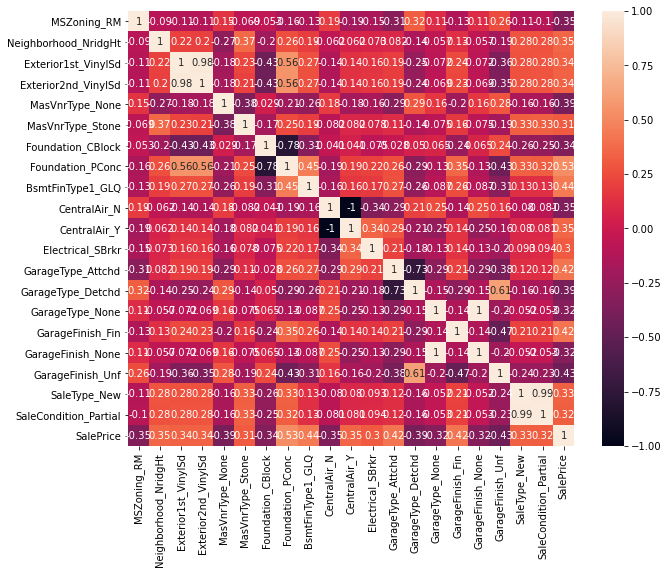

In [19]:
corr_obj=a.corr()
top_corr2=corr_obj[abs(corr_obj['SalePrice'])>=0.3].index
plt.figure(figsize=(10,8))
sns.heatmap(a[top_corr2].corr(),annot=True)

In [181]:
top_corr_obj=corr_obj[abs(corr_obj['SalePrice'])>=0.3].iloc[:,-1]
pd.Series(top_corr_obj).sort_values(ascending=False)

SalePrice                1.000000
Foundation_PConc         0.530840
BsmtFinType1_GLQ         0.440764
GarageFinish_Fin         0.418881
GarageType_Attchd        0.415787
Neighborhood_NridgHt     0.351803
CentralAir_Y             0.351599
Exterior2nd_VinylSd      0.337444
Exterior1st_VinylSd      0.336138
SaleType_New             0.329190
SaleCondition_Partial    0.324471
MasVnrType_Stone         0.311370
Electrical_SBrkr         0.304861
GarageType_None         -0.322998
GarageFinish_None       -0.322998
Foundation_CBlock       -0.337815
MSZoning_RM             -0.347446
CentralAir_N            -0.351599
MasVnrType_None         -0.387818
GarageType_Detchd       -0.388638
GarageFinish_Unf        -0.432012
Name: SalePrice, dtype: float64

## 숫자형 데이터에서 종속변수(SalePrice)와 높은 상관관계 가진 변수 확인
- 피어슨 상관관계 0.3 이상인 변수만 추출

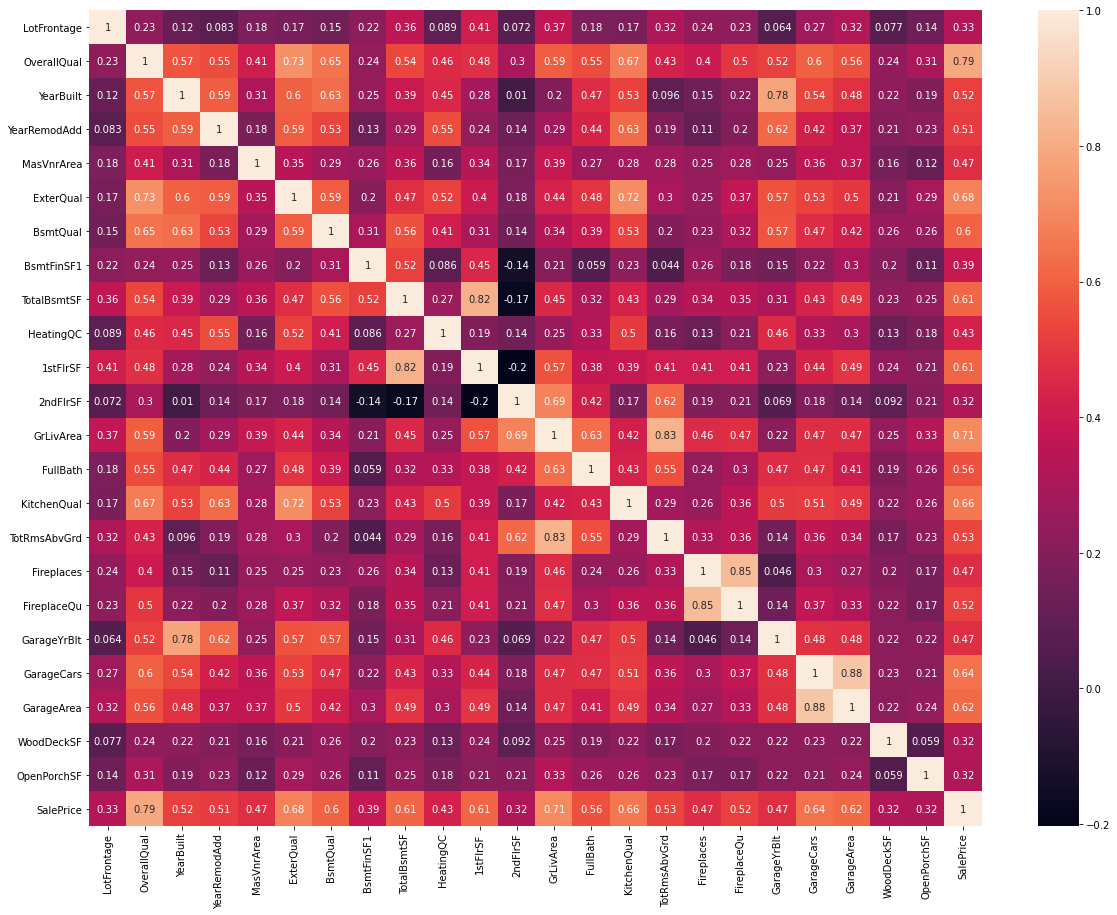

In [49]:
corr=num_data.corr()
top_corr=corr[abs(corr['SalePrice'])>=0.3].index
plt.figure(figsize=(20,15))
sns.heatmap(num_data[top_corr].corr(),annot=True)

In [94]:
top=corr[abs(corr['SalePrice'])>=0.3].iloc[:,-1]
pd.Series(top).sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
ExterQual       0.682639
KitchenQual     0.659600
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
BsmtQual        0.604816
FullBath        0.560664
TotRmsAbvGrd    0.533723
FireplaceQu     0.523798
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
GarageYrBlt     0.470177
Fireplaces      0.466929
HeatingQC       0.427649
BsmtFinSF1      0.386420
LotFrontage     0.334901
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
Name: SalePrice, dtype: float64

In [ ]:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
ExterQual       0.682639
KitchenQual     0.659600

TotalBsmtSF     0.613581
1stFlrSF        0.605852

FullBath        0.560664
TotRmsAbvGrd    0.533723
FireplaceQu     0.523798
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614

Fireplaces      0.466929
HeatingQC       0.427649

LotFrontage     0.334901
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
Name: SalePrice, dtype: float64
        
SalePrice                1.000000
Foundation_PConc         0.530840



Neighborhood_NridgHt     0.351803
CentralAir_Y             0.351599
Exterior2nd_VinylSd      0.337444
Exterior1st_VinylSd      0.336138
SaleType_New             0.329190
SaleCondition_Partial    0.324471
MasVnrType_Stone         0.311370
Electrical_SBrkr         0.304861

GarageFinish_None       -0.322998
Foundation_CBlock       -0.337815
MSZoning_RM             -0.347446
CentralAir_N            -0.351599
MasVnrType_None         -0.387818


Name: SalePrice, dtype: float64

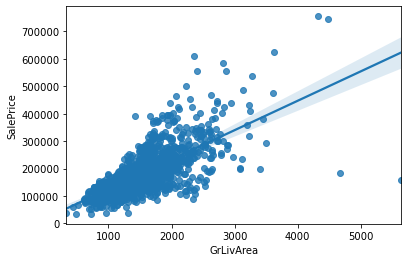

In [85]:
sns.regplot(x='GrLivArea',y='SalePrice',data=num_data)

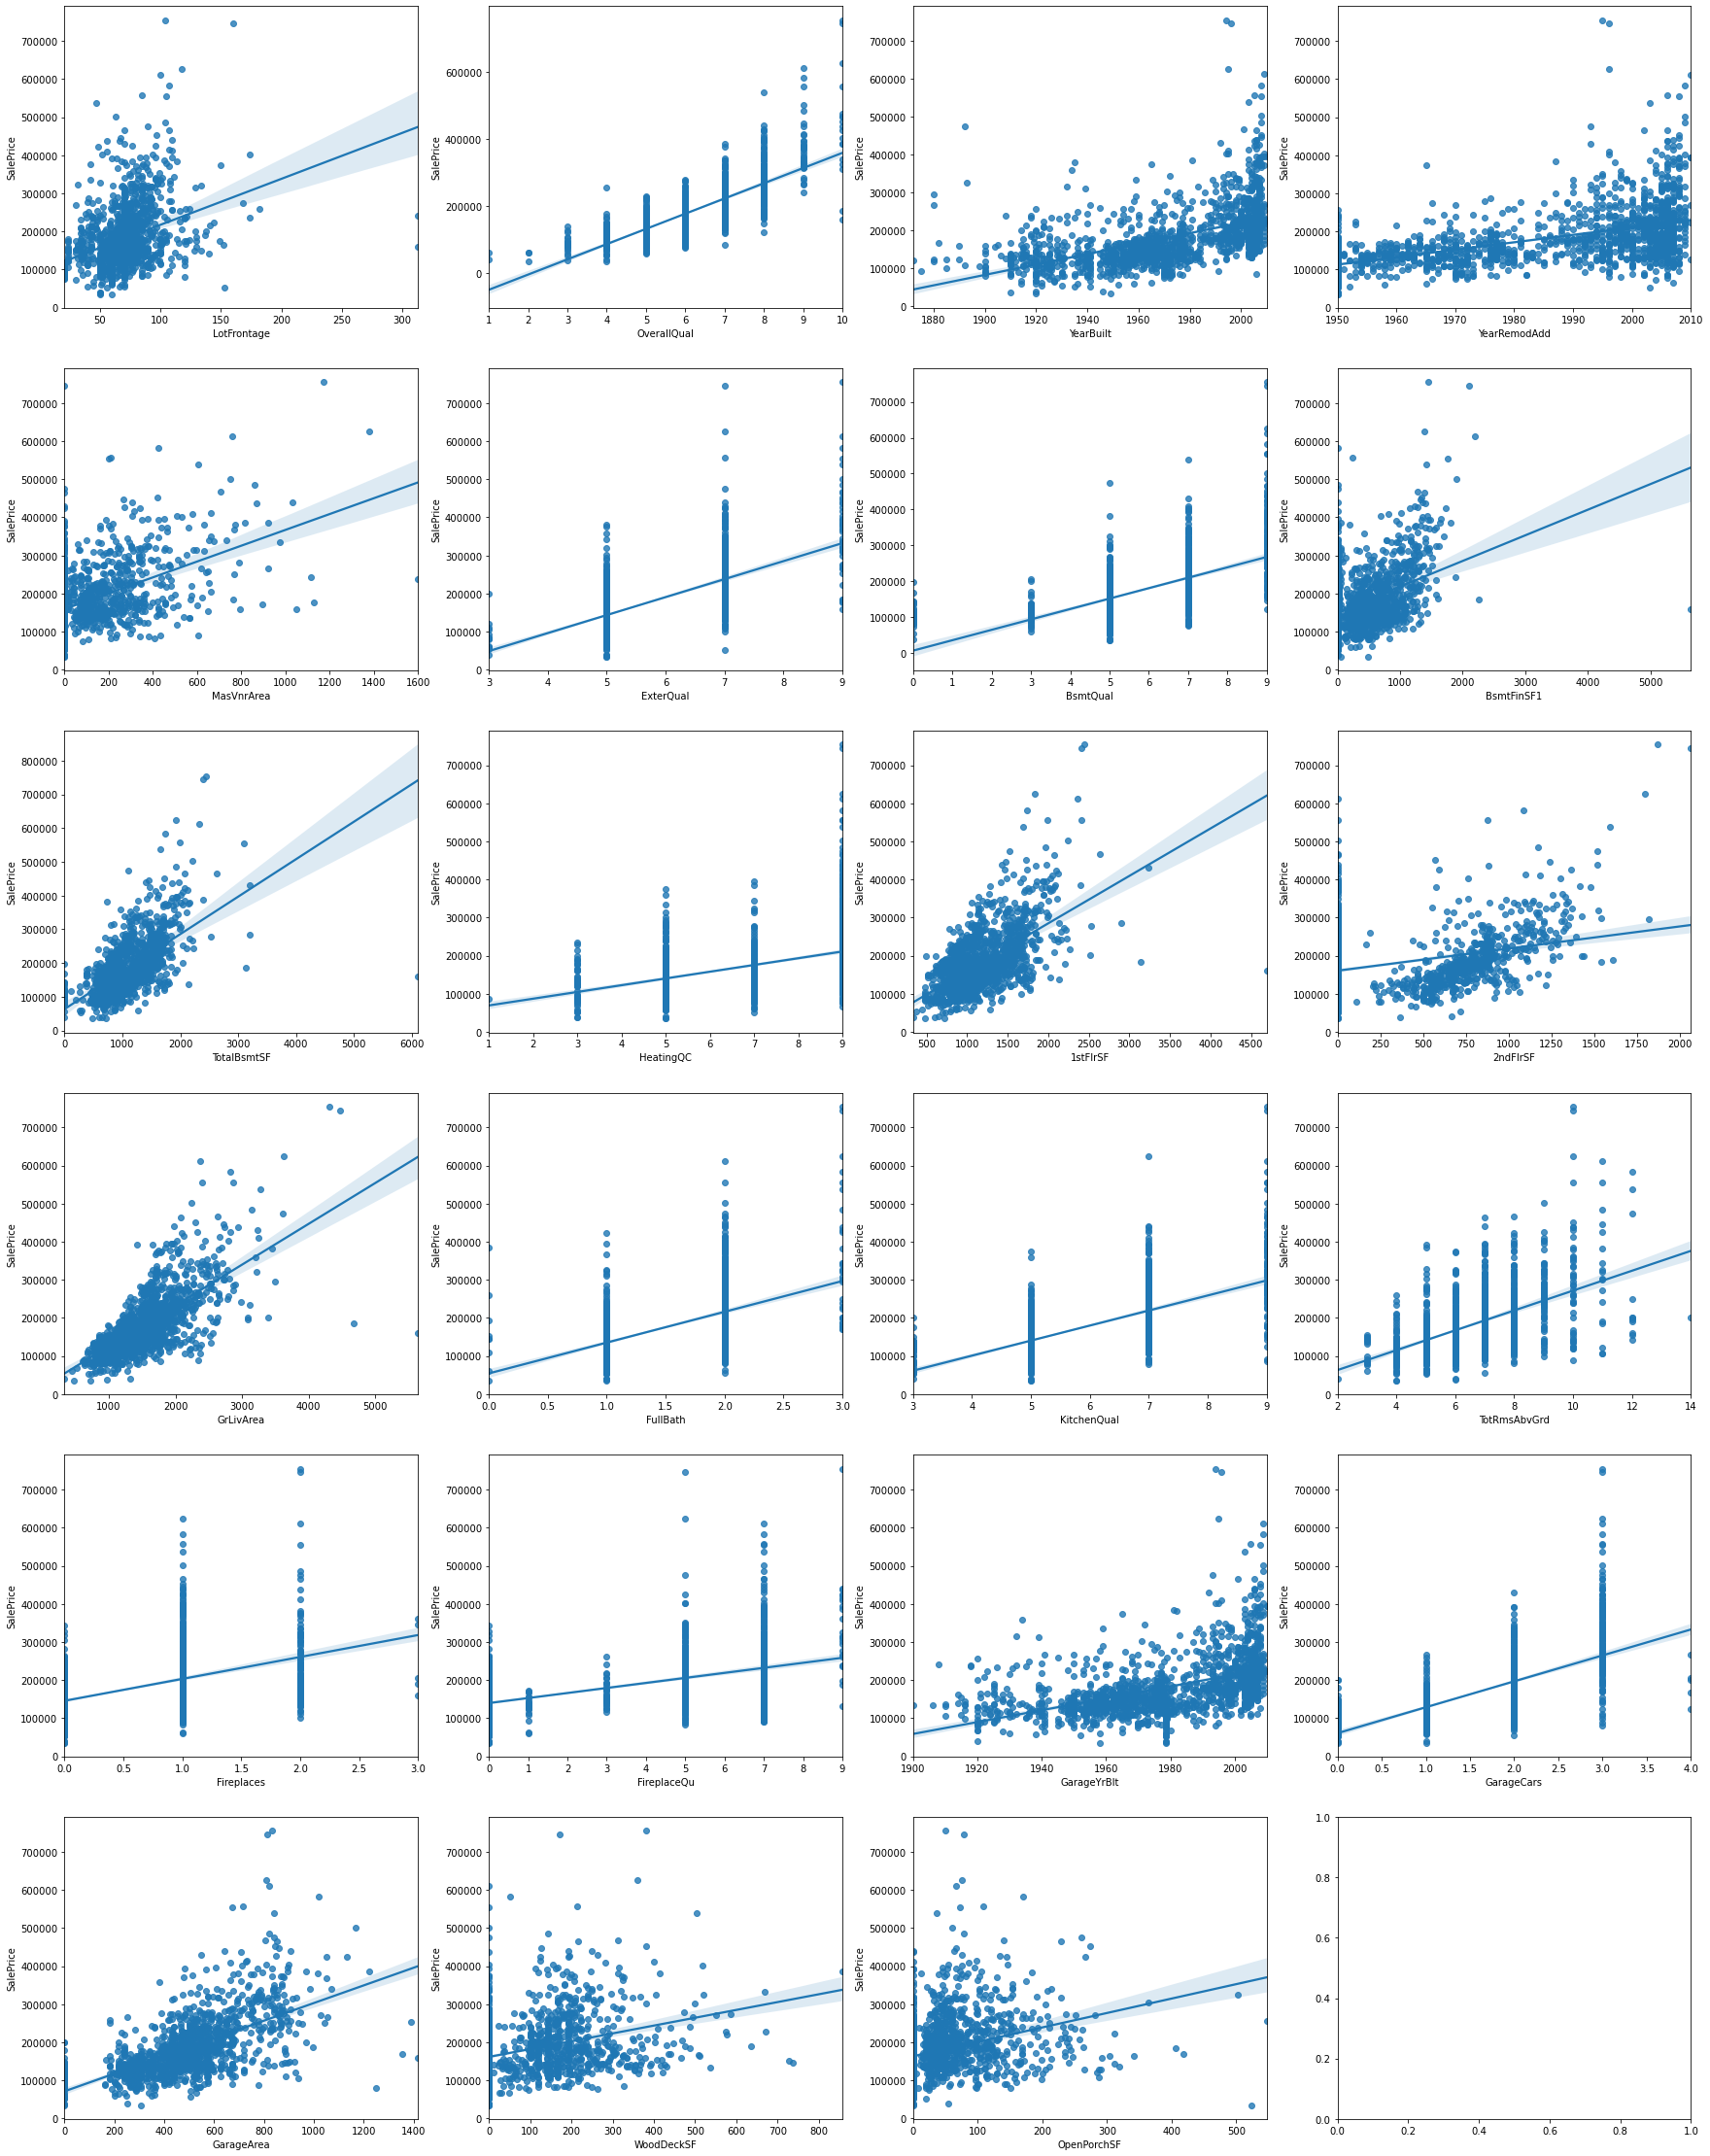

In [61]:
#상관관계가 높은 데이터들의 이상치 데이터 확인
features=['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'BsmtQual', 'BsmtFinSF1', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']
fig,axs=plt.subplots(figsize=(30,40),nrows=6,ncols=4)
for i,feature in enumerate(features):
    row=int(i/4)
    col=i%4
    sns.regplot(x=feature,y='SalePrice',data=num_data,ax=axs[row][col])
    

In [283]:
data_df.groupby('SaleType')['SalePrice'].count()

SaleType
COD        43
CWD         4
Con         2
ConLD       9
ConLI       5
ConLw       5
New       122
Oth         3
WD       1267
Name: SalePrice, dtype: int64

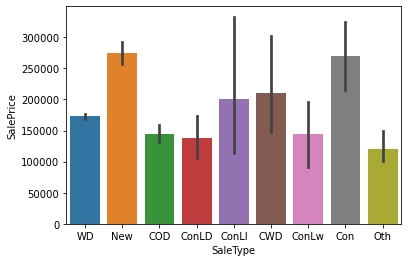

In [282]:
sns.barplot(x='SaleType',y='SalePrice',data=p)

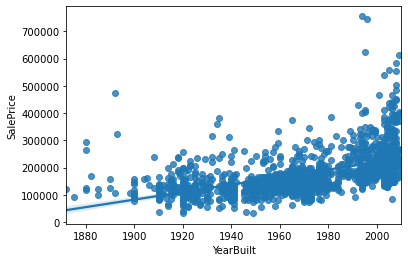

In [281]:
sns.regplot(x='YearBuilt',y='SalePrice',data=num_data)

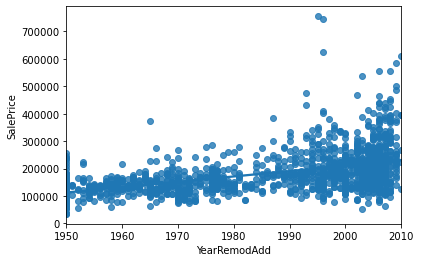

In [280]:
sns.regplot(x='YearRemodAdd',y='SalePrice',data=num_data)

In [279]:
data_df.groupby('HeatingQC')['SalePrice'].count()

HeatingQC
1      1
3     49
5    428
7    241
9    741
Name: SalePrice, dtype: int64

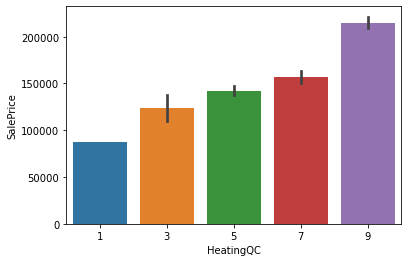

In [278]:
sns.barplot(x='HeatingQC',y='SalePrice',data=p)

In [277]:
data_df.groupby('Electrical')['SalePrice'].count()

Electrical
FuseA      94
FuseF      27
FuseP       3
Mix         1
SBrkr    1334
Name: SalePrice, dtype: int64

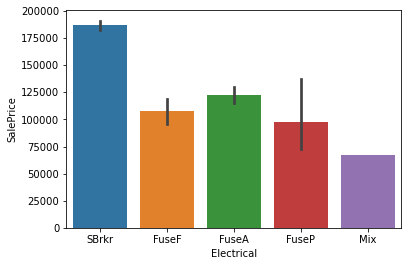

In [276]:
sns.barplot(x='Electrical',y='SalePrice',data=p)

In [275]:
data_df.groupby('FullBath')['SalePrice'].count()

FullBath
0      9
1    650
2    768
3     33
Name: SalePrice, dtype: int64

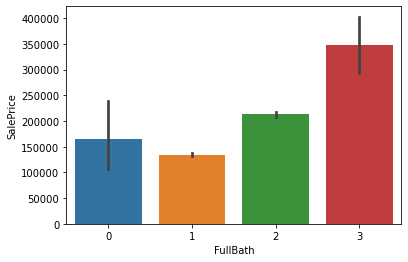

In [274]:
sns.barplot(x='FullBath',y='SalePrice',data=p)

In [289]:
obj_data['BsmtFinType1'][obj_data['BsmtFinType1']=='None'].count()

37

In [288]:
data_df.groupby('BsmtFinType1')['SalePrice'].count()

BsmtFinType1
ALQ    220
BLQ    148
GLQ    418
LwQ     74
Rec    133
Unf    430
Name: SalePrice, dtype: int64

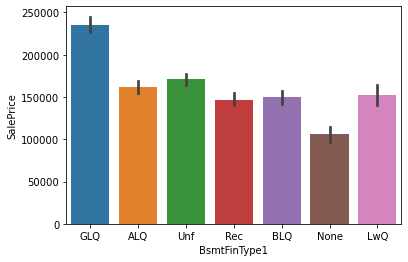

In [284]:
sns.barplot(x='BsmtFinType1',y='SalePrice',data=p)

In [292]:
data_df.groupby('BsmtQual')['SalePrice'].count()

BsmtQual
0     37
3     35
5    649
7    618
9    121
Name: SalePrice, dtype: int64

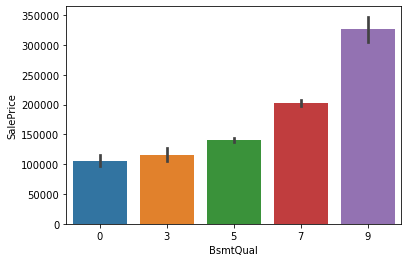

In [291]:
sns.barplot(x='BsmtQual',y='SalePrice',data=p)

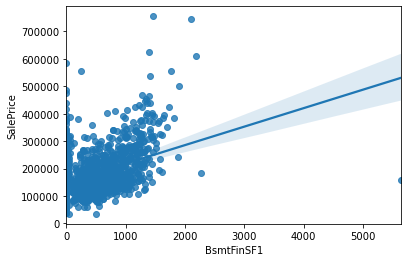

In [290]:
sns.regplot(x='BsmtFinSF1',y='SalePrice',data=num_data)

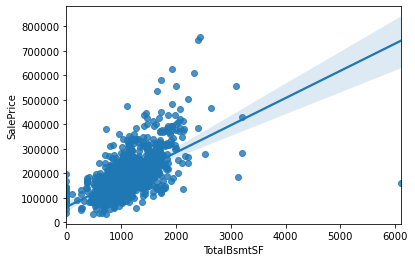

In [271]:
sns.regplot(x='TotalBsmtSF',y='SalePrice',data=num_data)

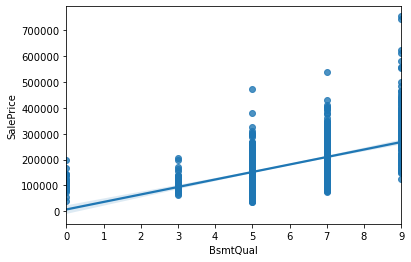

In [183]:
sns.regplot(x='BsmtQual',y='SalePrice',data=num_data)

In [298]:
num_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,5.791781,5.167123,6.003425,4.895205,443.639726,46.549315,567.240411,1057.429452,7.290411,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.023288,6.517808,0.613014,3.123288,1978.506164,1.767123,472.980137,4.676027,4.673288,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,1.148561,0.702108,1.656396,0.972890,456.098091,161.319273,441.866955,438.705324,1.919002,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.327520,1.625393,0.644666,3.148572,23.994583,0.747315,213.804841,1.232349,1.224929,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,5.000000,5.000000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,5.000000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,5.000000,0.000000,0.000000,1962.000000,1.000000,334.500000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,5.000000,5.000000,7.000000,5.000000,383.500000,0.000000,477.500000,991.500000,9.000000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,5.000000,6.000000,1.000000,3.000000,1978.506164,2.000000,480.000000,5.000000,5.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,7.000000,5.000000,7.000000,5.000000,712.250000,0.000000,808.000000,1298.250000,9.000000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,7.000000,1.000000,7.000000,2001.000000,2.000000,576.000000,5.000000,5.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,9.000000,9.000000,9.000000,7.000000,5644.000000,1474.000000,2336.000000,6110.000000,9.000000,4692.000000,2065.000

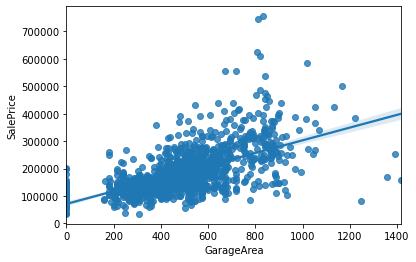

In [236]:
sns.regplot(x='GarageArea',y='SalePrice',data=num_data)

In [296]:
data_df.groupby('GarageCars')['SalePrice'].count()

GarageCars
0     81
1    369
2    824
3    181
4      5
Name: SalePrice, dtype: int64

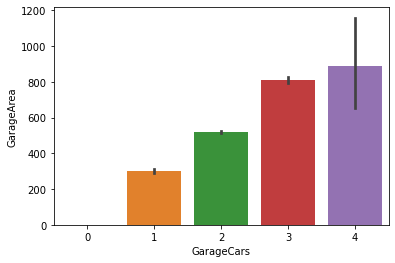

In [294]:
sns.barplot(x='GarageCars',y='GarageArea',data=p)

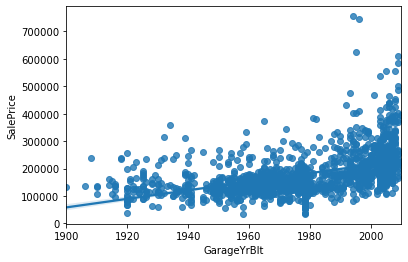

In [242]:
sns.regplot(x='GarageYrBlt',y='SalePrice',data=num_data)

In [235]:
data_df.groupby('GarageCars')['SalePrice'].count()

GarageCars
0     81
1    369
2    824
3    181
4      5
Name: SalePrice, dtype: int64

In [230]:
data_df.groupby('GarageType')['SalePrice'].count()

GarageType
2Types       6
Attchd     870
Basment     19
BuiltIn     88
CarPort      9
Detchd     387
Name: SalePrice, dtype: int64

In [228]:
z=pd.concat([obj_data,data_df['SalePrice']],axis=1)
z

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,CentralAir,Electrical,Functional,GarageType,GarageFinish,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,No,GLQ,Unf,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,None,None,WD,Normal,208500
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,Gd,ALQ,Unf,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,None,None,WD,Normal,181500
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,Mn,GLQ,Unf,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,None,None,WD,Normal,223500
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,No,ALQ,Unf,GasA,Y,SBrkr,Typ,Detchd,Unf,Y,None,None,WD,Abnorml,140000
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,Av,GLQ,Unf,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,None,None,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,No,Unf,Unf,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,None,None,WD,Normal,175000
1456,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,CBlock,No,ALQ,Rec,GasA,Y,SBrkr,Min1,Attchd,Unf,Y,MnPrv,None,WD,Normal,210000
1457,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Stone,No,GLQ,Unf,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,GdPrv,Shed,WD,Normal,266500
1458,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,CBlock,Mn,GLQ,Rec,GasA,Y,FuseA,Typ,Attchd,Unf,Y,None,None,WD,Normal,142125


In [262]:
p=pd.concat([obj_data,num_data],axis=1)
p

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,CentralAir,Electrical,Functional,GarageType,GarageFinish,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,No,GLQ,Unf,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,None,None,WD,Normal,60,65.0,8450,7,5,2003,2003,196.0,7,5,7,5,706,0,150,856,9,856,854,0,1710,1,0,2,1,3,1,7,8,0,0,2003.0,2,548,5,5,0,61,0,0,0,0,0,2,2008,208500
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,Gd,ALQ,Unf,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,None,None,WD,Normal,20,80.0,9600,6,8,1976,1976,0.0,5,5,7,5,978,0,284,1262,9,1262,0,0,1262,0,1,2,0,3,1,5,6,1,5,1976.0,2,460,5,5,298,0,0,0,0,0,0,5,2007,181500
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,Mn,GLQ,Unf,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,None,None,WD,Normal,60,68.0,11250,7,5,2001,2002,162.0,7,5,7,5,486,0,434,920,9,920,866,0,1786,1,0,2,1,3,1,7,6,1,5,2001.0,2,608,5,5,0,42,0,0,0,0,0,9,2008,223500
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,No,ALQ,Unf,GasA,Y,SBrkr,Typ,Detchd,Unf,Y,None,None,WD,Abnorml,70,60.0,9550,7,5,1915,1970,0.0,5,5,5,7,216,0,540,756,7,961,756,0,1717,1,0,1,0,3,1,7,7,1,7,1998.0,3,642,5,5,0,35,272,0,0,0,0,2,2006,140000
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,Av,GLQ,Unf,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,None,None,WD,Normal,60,84.0,14260,8,5,2000,2000,350.0,7,5,7,5,655,0,490,1145,9,1145,1053,0,2198,1,0,2,1,4,1,7,9,1,5,2000.0,3,836,5,5,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,No,Unf,Unf,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,None,None,WD,Normal,60,62.0,7917,6,5,1999,2000,0.0,5,5,7,5,0,0,953,953,9,953,694,0,1647,0,0,2,1,3,1,5,7,1,5,1999.0,2,460,5,5,0,40,0,0,0,0,0,8,2007,175000
1456,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,CBlock,No,ALQ,Rec,GasA,Y,SBrkr,Min1,Attchd,Unf,Y,MnPrv,None,WD,Normal,20,85.0,13175,6,6,1978,1988,119.0,5,5,7,5,790,163,589,1542,5,2073,0,0,2073,1,0,2,0,3,1,5,7,2,5,1978.0,2,500,5,5,349,0,0,0,0,0,0,2,2010,210000
1457,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Stone,No,GLQ,Unf,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,GdPrv,Shed,WD,Normal,70,66.0,9042,7,9,1941,2006,0.0,9,7,5,7,275,0,877,1152,9,1188,1152,0,2340,0,0,2,0,4,1,7,9,2,7,1941.0,1,252,5,5,0,60,0,0,0,0,2500,5,2010,266500
1458,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,CBlock,Mn,GLQ,Rec,GasA,Y,FuseA,Typ,Attchd,Unf,Y,None,None,WD,Normal,20,68.0,9717,5,6,1950,1996,0.0,5,5,5,5,49,1029,0,1078,7,1078,0,0,1078,1,0,1,0,2,1,7,5,0,0,1950.0,1,240,5,5,366,0,112,0,0,0,0,4,2010,142125


In [293]:
data_df.groupby('GarageType')['SalePrice'].count()

GarageType
2Types       6
Attchd     870
Basment     19
BuiltIn     88
CarPort      9
Detchd     387
Name: SalePrice, dtype: int64

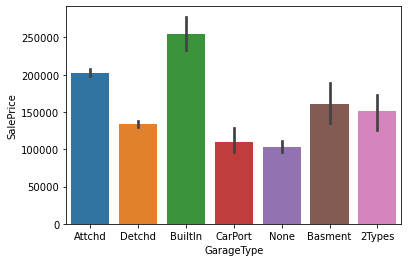

In [229]:
sns.barplot(x='GarageType',y='SalePrice',data=z)

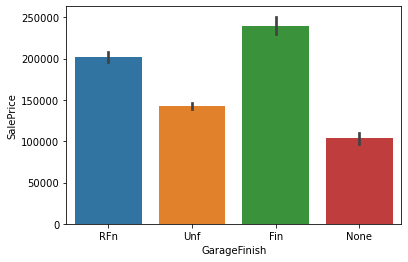

In [243]:
sns.barplot(x='GarageFinish',y='SalePrice',data=z)

In [244]:
data_df.groupby('GarageFinish')['SalePrice'].count()

GarageFinish
Fin    352
RFn    422
Unf    605
Name: SalePrice, dtype: int64

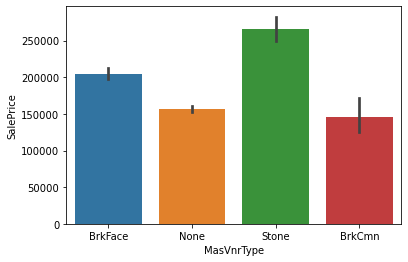

In [246]:
sns.barplot(x='MasVnrType',y='SalePrice',data=z)

In [247]:
data_df.groupby('MasVnrType')['SalePrice'].count()

MasVnrType
BrkCmn      15
BrkFace    445
None       864
Stone      128
Name: SalePrice, dtype: int64

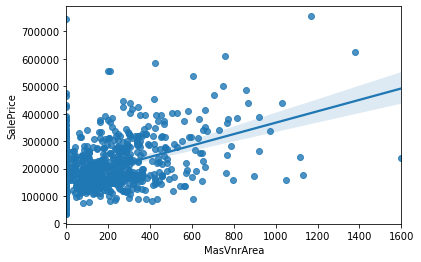

In [248]:
sns.regplot(x='MasVnrArea',y='SalePrice',data=num_data)

In [272]:
num_data['TotalBsmtSF'][num_data['TotalBsmtSF']==0].count()

37

In [264]:
data_df.groupby('MasVnrType')['SalePrice'].count()qh

MasVnrType
BrkCmn      15
BrkFace    445
None       864
Stone      128
Name: SalePrice, dtype: int64

In [269]:
data_df.groupby('KitchenQual')['SalePrice'].count()

KitchenQual
3     39
5    735
7    586
9    100
Name: SalePrice, dtype: int64

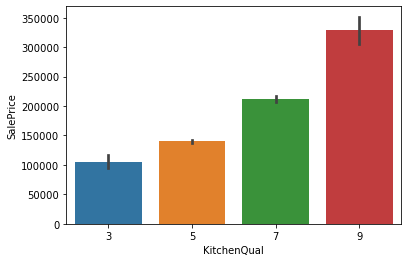

In [268]:
sns.barplot(x='KitchenQual',y='SalePrice',data=p)

In [299]:
A=np.random.randn(4,3)
A

array([[-0.28397887, -0.1932669 ,  1.16569185],
       [ 1.10478303,  0.17537668,  0.68537755],
       [-0.07495397,  1.79611085,  0.34710501],
       [ 0.46275708, -0.97955113, -0.84720183]])

In [302]:
B=np.sum(A,axis=1,keepdims=True)
B.shape

(4, 1)

In [301]:
np.sum(A,axis=1,keepdims=False)

array([ 0.68844607,  1.96553726,  2.06826189, -1.36399588])

In [14]:
obj_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          1460 non-null   object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1460 non-null   object
 18  Foundation     1460 non-null

In [15]:
num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1460 non-null   float64
 8   ExterQual      1460 non-null   int64  
 9   ExterCond      1460 non-null   int64  
 10  BsmtQual       1460 non-null   int64  
 11  BsmtCond       1460 non-null   int64  
 12  BsmtFinSF1     1460 non-null   int64  
 13  BsmtFinSF2     1460 non-null   int64  
 14  BsmtUnfSF      1460 non-null   int64  
 15  TotalBsmtSF    1460 non-null   int64  
 16  HeatingQC      1460 non-null   int64  
 17  1stFlrSF       1460 non-null   int64  
 18  2ndFlrSF

In [31]:
num_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,7,5,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,5,5,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,7,5,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,5,5,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,7,5,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,5,5,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,5,5,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,9,7,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,5,5,...,366,0,112,0,0,0,0,4,2010,142125


In [32]:
data_df=pd.concat([obj_data_dum,num_data],axis=1)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 262 entries, MSZoning_C (all) to SalePrice
dtypes: float64(3), int64(43), uint8(216)
memory usage: 832.8 KB


In [33]:
data_df['SalePrice']=np.log1p(data_df['SalePrice'])

In [34]:
def get_rmse(model):
    pred=model.predict(X_test)
    mse=mean_squared_error(y_test,pred)
    rmse=np.sqrt(mse)
    return rmse


def get_rmses(models):
    rmses=[]
    for model in models:
        rmse=get_rmse(model)
        rmses.append(rmse)
    return rmses

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split

feature=data_df.drop('SalePrice',axis=1,inplace=False)
data_df['SalePrice']=np.log1p(data_df['SalePrice'])
target=data_df['SalePrice']

X_train,X_test,y_train,y_test=train_test_split(feature,target,test_size=0.2,random_state=156)

lr_reg=LinearRegression()
lr_reg.fit(X_train,y_train)
target

0       2.583824
1       2.573300
2       2.589054
3       2.553297
4       2.597433
          ...   
1455    2.570514
1456    2.584365
1457    2.602181
1458    2.554469
1459    2.557351
Name: SalePrice, Length: 1460, dtype: float64

In [36]:
ridge_reg=Ridge()
ridge_reg.fit(X_train,y_train)
lasso_reg=Lasso()
lasso_reg.fit(X_train,y_train)

models=[lr_reg,ridge_reg,lasso_reg]
get_rmses(models)

[0.010062441772501129, 0.009747628640848561, 0.017959243972006583]